In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
ROOT_FOLDER = '/content/drive/MyDrive/'

In [4]:
# data is now our pandas DataFrame containing all of the data from our csv file
df = pd.read_csv(ROOT_FOLDER + "eviction_num_by_muni.csv",index_col=0)

In [5]:
df

,eviction_num
property_address_city,
Worcester,3743
Springfield,2983
Fall River,2355
New Bedford,2282
Lowell,1741
...,...
North Truro,1
North Pembroke,1
West Chatham,1


In [6]:
# data is now our pandas DataFrame containing all of the data from our csv file
household = pd.read_csv(ROOT_FOLDER + "household_muni.csv",index_col=0)

In [7]:
# household_new

In [7]:
household_new = pd.merge(household, df[df.index.isin(household.index)], left_on=household.index, right_on=df[df.index.isin(household.index)].index)

In [8]:
household_new = household_new.drop(['Eviction Numbers'], axis=1)

In [9]:
household_new.rename(columns={'key_0':'Muni'}, inplace=True)

In [10]:
household_new = household_new.drop('Evictions per Rented Households', axis=1)

In [11]:
household_new['Evictions per Rented Households']= household_new[' eviction_num']/household_new['Renter Occupied']

In [12]:
household_new = household_new.sort_values('Evictions per Rented Households', ascending=False)

In [13]:
#income per household per municipality
income = pd.read_csv(ROOT_FOLDER+'2019_5Y_Income.csv',skiprows=1)
#occupation of people in municipalities
occupation = pd.read_csv(ROOT_FOLDER+'2019_5Y_Occupation.csv',skiprows=1)
#educational attainments of people in a municipality
edu = pd.read_csv(ROOT_FOLDER+'2019_5Y_EducationalAttainment.csv',skiprows=1)
#data of evictions
cdf = pd.read_csv(ROOT_FOLDER+'eviction_num_by_muni.csv')
#Munis that had high eviction_count to population ratio 
# munis_to_focus = ['Fall River', 'Worcester', 'New Bedford', 'Fitchburg', 'Gardner', 'Webster', 
#                   'Framingham', 'Rowe', 'North Adams', 'Marlborough']

In [14]:
counts = cdf[cdf['property_address_city'].isin(household.index)]
counts.rename(columns={'property_address_city':'Muni','eviction_num':'Eviction Numbers'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
# counts

In [16]:
# #data cleaning function 1
def df_clean(df):
    muni_list = []
    for x in range(df.shape[0]):
        wsplit = []
        wsplit = df.iloc[x]['Geographic Area Name'].split()
        word = ' '
        reject_list = ['town','Town','city','City','city,','City,','town,','Town,']
        for w in wsplit:
            if w in reject_list:
                break
            else:    
                word += ' ' + w 
        muni_list.append(word)    
    df['Geographic Area Name'] = muni_list
    df['Geographic Area Name'] = df['Geographic Area Name'].str.lstrip()
    df['Geographic Area Name'] = df['Geographic Area Name'].str.rstrip()    
    
    return df

In [17]:
#data cleaning function 2
def keep_estimates(idf):
    boolCols = idf.columns.str.contains('Estimate')
    newCols = list(idf.columns[0:2])
    for col in range(2,len(boolCols)):
        if boolCols[col] == True:
            newCols.append(idf.columns[col])
    df = idf[newCols]
    
    return df

In [18]:
income = df_clean(keep_estimates(income));
occupation = df_clean(keep_estimates(occupation));
edu = df_clean(keep_estimates(edu));

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [19]:
#Merging munis with corresponding socio-economic features
income_df =  pd.merge(counts,income,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])
occu_df =  pd.merge(counts,occupation,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])
edu_df =  pd.merge(counts,edu,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])

In [20]:
# edu_df

In [21]:
edu_with_rate = pd.merge(household_new, edu_df, left_on=household_new['Muni'], right_on=edu_df.Muni)

In [22]:
edu_with_rate = edu_with_rate.drop(['Muni_x', 'Muni_y', ' eviction_num_y'], axis=1)

In [23]:
edu_with_rate.rename(columns={'key_0':'Muni', ' eviction_num_x': 'eviction_num'}, inplace=True)

In [24]:
edu_with_rate[edu_with_rate['Muni'] == 'Holyoke']

,Muni,Total Households,Renter Occupied Pct,Renter Occupied,eviction_num,Evictions per Rented Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency),Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!Bachelor's degree or higher,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone!!High school graduate or higher,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone!!Bachelor's degree or higher,"Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino","Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino!!High school graduate or higher","Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino!!Bachelor's degree or higher",Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Black alone,...,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!High school graduate or higher,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!Bachelor's degree or higher,Estimate!!Percent Female!!RACE AND HISPANIC OR LATINO 

In [25]:
edu_with_rate[edu_with_rate['Muni'] == 'Randolph']

,Muni,Total Households,Renter Occupied Pct,Renter Occupied,eviction_num,Evictions per Rented Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency),Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!Bachelor's degree or higher,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone!!High school graduate or higher,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone!!Bachelor's degree or higher,"Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino","Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino!!High school graduate or higher","Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino!!Bachelor's degree or higher",Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Black alone,...,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!High school graduate or higher,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!Bachelor's degree or higher,Estimate!!Percent Female!!RACE AND HISPANIC OR LATINO 

In [26]:
edu_with_rate.sort_values('eviction_num')
#pd.set_option('display.max_columns', None)

,Muni,Total Households,Renter Occupied Pct,Renter Occupied,eviction_num,Evictions per Rented Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency),Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!Bachelor's degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!Bachelor's degree or higher,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone!!High school graduate or higher,Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone!!Bachelor's degree or higher,"Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino","Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino!!High school graduate or higher","Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!White alone, not Hispanic or Latino!!Bachelor's degree or higher",Estimate!!Total!!RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT!!Black alone,...,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!High school graduate or higher,Estimate!!Percent Female!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!Bachelor's degree or higher,Estimate!!Percent Female!!RACE AND HISPANIC OR LATINO 

In [ ]:
# edu_with_rate.rename(columns={'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma':'No High School Deploma', 
#                                                     'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)':'High School Deploma', 
#                                                     'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree': 'No College Degree', 
#                                                     "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher": 'Bachelors Degree or Higher'}, inplace=True)
# edu_with_rate['Less than High School Deploma'] = edu_with_rate["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher"]
# edu_with_rate['Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate'] 
#                                                         + edu_with_rate['Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma']
# edu_with_rate['High School Graduate Only'] = edu_with_rate['Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)']
# edu_with_rate["Some College or Associate's Degree"] = edu_with_rate['']

In [27]:
edu_with_rate['Less than High School Deploma'] = edu_with_rate['Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma'].astype('float')
edu_with_rate['High School Deploma'] = edu_with_rate['Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)'].astype('float')
edu_with_rate['Some college, No degree']= edu_with_rate['Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree'].astype('float')
edu_with_rate["Associate's degree"] = edu_with_rate["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree"].astype('float')
#edu_with_rate["Bachelor's degree or Higher"] = edu_with_rate["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree"]#.astype('float')	#+ edu_with_rate["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree"].astype('float')
# edu_with_rate["High school graduate or higher"] = edu_with_rate["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher"]	
edu_with_rate["Bachelor's degree or higher"] = edu_with_rate["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree"].astype('float')	+ edu_with_rate["Estimate!!Percent!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree"].astype('float')

In [28]:
#brackets
one_to_ten_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/1kTO10K.csv',skiprows=1)
ten_to_fifty_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/10kTO50K.csv',skiprows=1)
fifty_to_90_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/50kTO90K.csv',skiprows=1)
ninty_to_200_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/90kTO200K.csv',skiprows=1)

In [ ]:
# one_to_ten_k

In [29]:
edu_one_to_ten_k = edu_with_rate[edu_with_rate["Muni"].isin(one_to_ten_k.Middleton.append(pd.Series('Middleton')))]

In [ ]:
# edu_one_to_ten_k

In [30]:
ecolumns = ['Muni','Less than High School Deploma', 'High School Deploma',
       'Some college, No degree', "Associate's degree",
       "Bachelor's degree or higher"]

In [31]:
low_three_1 = edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=20].sort_values('Evictions per Rented Households', ascending=False).head(2).filter(ecolumns, axis=1)
top_three_1 = edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(2).filter(ecolumns, axis=1)

In [32]:
low_three_1

,Muni,Less than High School Deploma,High School Deploma,"Some college, No degree",Associate's degree,Bachelor's degree or higher
14,Eastham,1.1,21.3,16.3,9.7,50.6
21,Orange,6.6,40.2,20.7,9.6,19.2


In [33]:
edu_1 = pd.concat([low_three_1, top_three_1.reindex(index=top_three_1.index[::-1])])

In [32]:
edu_1.Muni

14        Eastham
21         Orange
22      Salisbury
39          Adams
47           Ware
185     Lancaster
190        Nahant
193        Dalton
205    Boxborough
208      Rockport
Name: Muni, dtype: object

In [ ]:
# edu_1

In [ ]:
# low_three_1

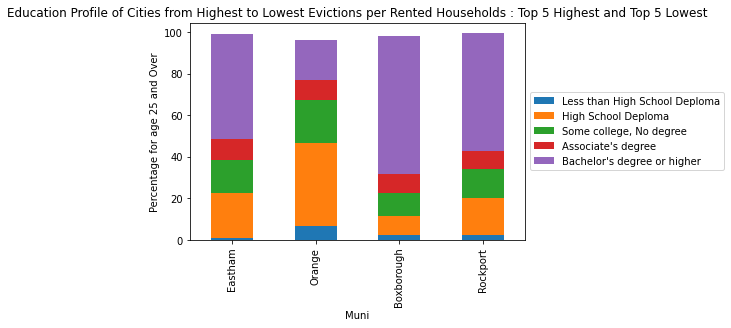

In [34]:
f = plt.figure()

plt.title('Education Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
edu_1.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage for age 25 and Over")
plt.show()

In [35]:
edu_ten_to_fifty_k = edu_with_rate[edu_with_rate["Muni"].isin(ten_to_fifty_k.Everett.append(pd.Series('Everett')))]
low_three_2 = edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(2).filter(ecolumns, axis=1)
top_three_2 = edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(2).filter(ecolumns, axis=1)

In [36]:
edu_2 = pd.concat([low_three_2, top_three_2.reindex(index=top_three_2.index[::-1])])

In [37]:
edu_2.Muni

1       Randolph
4          Athol
226    Dartmouth
228       Dennis
Name: Muni, dtype: object

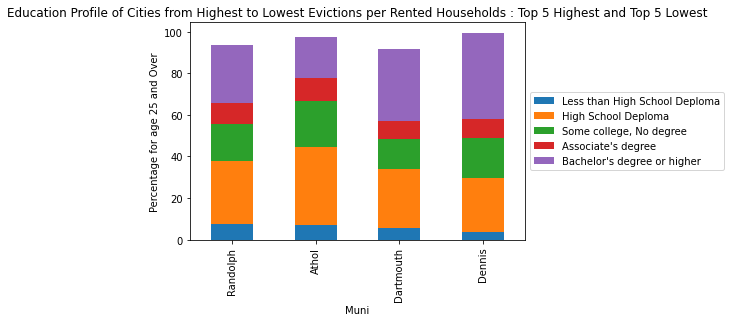

In [38]:
f = plt.figure()

plt.title('Education Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
edu_2.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage for age 25 and Over")
plt.show()

In [39]:
edu_fifty_to_90_k = edu_with_rate[edu_with_rate["Muni"].isin(fifty_to_90_k['Fall River'].append(pd.Series('Fall River')))]
low_three_3 = edu_fifty_to_90_k[edu_fifty_to_90_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).head(2).filter(ecolumns, axis=1)
top_three_3 = edu_fifty_to_90_k[edu_fifty_to_90_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(2).filter(ecolumns, axis=1)

In [40]:
edu_3 = pd.concat([low_three_3, top_three_3.reindex(index=top_three_3.index[::-1])])

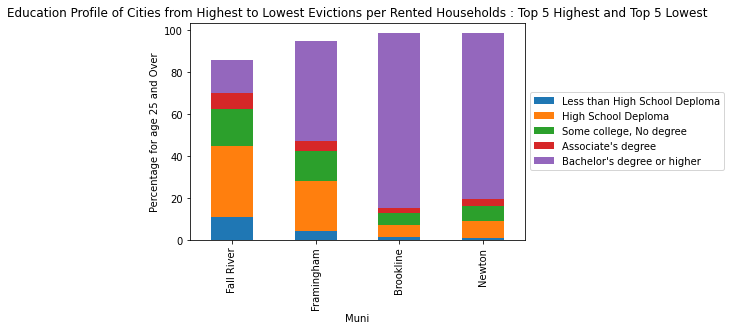

In [41]:
f = plt.figure()

plt.title('Education Profile of Cities from Highest to Lowest Evictions per Rented Households : Top 5 Highest and Top 5 Lowest', color='black')
edu_3.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage for age 25 and Over")
plt.show()

In [42]:
edu_ninty_to_200_k = edu_with_rate[edu_with_rate["Muni"].isin(ninty_to_200_k['Worcester'].append(pd.Series('Worcester')))]
edu_4 = edu_ninty_to_200_k[edu_ninty_to_200_k['eviction_num'] >=10].sort_values('Evictions per Rented Households', ascending=False).filter(ecolumns, axis=1)
#top_three_4 = edu_ninty_to_200_k[edu_ninty_to_200_k['eviction_num'] >=10].sort_values('Evictions per Rented Households').head(5).filter(['Muni','No High School Deploma', 'High School Deploma','No College Degree', 'Bachelors Degree or Higher'], axis=1)

In [41]:
# edu_ninty_to_200_k

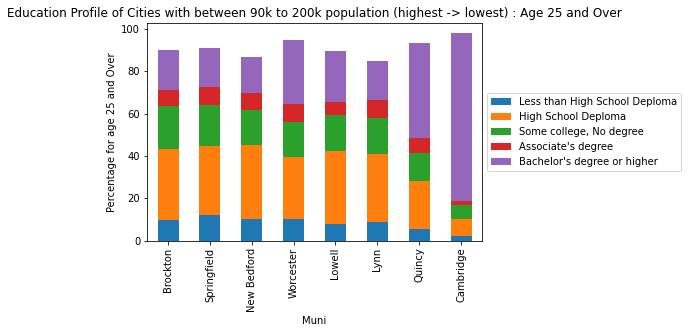

In [43]:
f = plt.figure()

plt.title('Education Profile of Cities with between 90k to 200k population (highest -> lowest) : Age 25 and Over', color='black')
edu_4.plot(x='Muni', kind='bar', stacked=True, ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Muni")
plt.ylabel("Percentage for age 25 and Over")
plt.show()

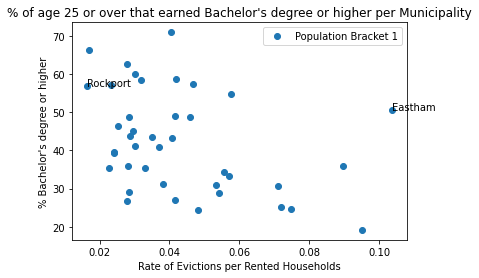

In [44]:
# rate_edu = linear_model.LinearRegression().fit(np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]["Bachelor's degree or higher"]).tolist())
# regression_line = rate_edu.predict(np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]["Bachelor's degree or higher"], 'o',
             label="Population Bracket 1")
# plt.plot(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line, label='Best Fit Line', color='blue', linewidth=4)

plt.annotate("Rockport", (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == "Rockport"]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == 'Rockport']["Bachelor's degree or higher"]))
plt.annotate("Eastham", (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == "Eastham"]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == 'Eastham']["Bachelor's degree or higher"]))



plt.title("% of age 25 or over that earned Bachelor's degree or higher per Municipality", color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("% Bachelor's degree or higher")
plt.legend(numpoints=1)
plt.show()

In [48]:
edu_one_to_ten_k.median()

Total Households                   2422.500000
Renter Occupied Pct                  17.800000
Renter Occupied                     407.000000
eviction_num                         13.500000
Evictions per Rented Households       0.037401
                                      ...     
Less than High School Deploma         3.400000
High School Deploma                  24.550000
Some college, No degree              16.250000
Associate's degree                    9.350000
Bachelor's degree or higher          42.250000
Length: 264, dtype: float64

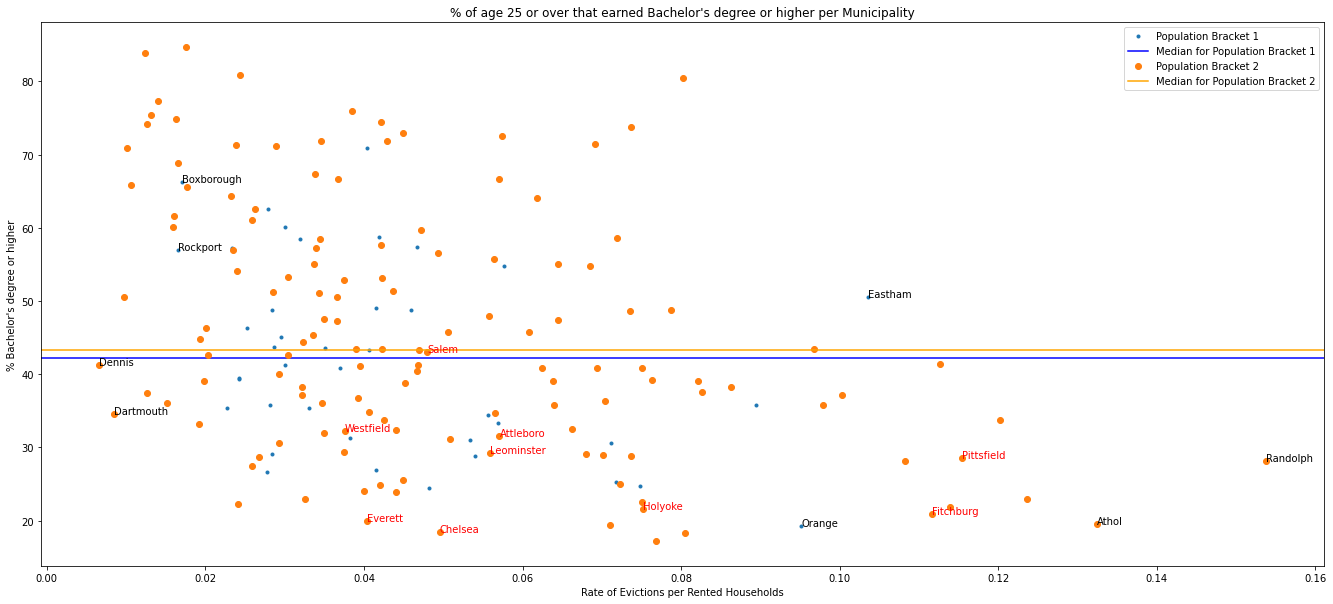

In [51]:
plt.figure(figsize=(23,10))

# rate_edu = linear_model.LinearRegression().fit(np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]["Bachelor's degree or higher"]).tolist())
# regression_line = rate_edu.predict(np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]["Bachelor's degree or higher"], '.',
             label="Population Bracket 1")
# plt.plot(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line, label='Best Fit Line', color='blue', linewidth=4)
plt.axhline(y=42.250000, label='Median for Population Bracket 1', color='b', linestyle='-')

plt.annotate("Rockport", (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == "Rockport"]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == 'Rockport']["Bachelor's degree or higher"]))
plt.annotate("Eastham", (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == "Eastham"]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == 'Eastham']["Bachelor's degree or higher"]))

plt.annotate("Orange", (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == "Orange"]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == 'Orange']["Bachelor's degree or higher"]))
plt.annotate("Boxborough", (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == "Boxborough"]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == 'Boxborough']["Bachelor's degree or higher"]))


# rate_edu = linear_model.LinearRegression().fit(np.array(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]["Bachelor's degree or higher"]).tolist())
# regression_line1 = rate_edu.predict(np.array(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
# plt.plot(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line1, label='Best Fit Line for Population Bracket 2', color='orange', linewidth=1)
plt.plot(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'], edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]["Bachelor's degree or higher"], 'o',
             label="Population Bracket 2")
plt.axhline(y=43.250000, label='Median for Population Bracket 2', color='orange', linestyle='-')

for city in (edu_2["Muni"].tolist()):
  plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                        edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Bachelor's degree or higher"]))

gateway_cities = ["Attleboro", "Brockton", "Chelsea", "Chicopee", "Everett", "Fall River", "Fitchburg", "Haverhill", "Holyoke",
                  "Lawrence", "Leominster", "Lowell", "Lynn", "Malden", 
                  "Methuen", "New Bedford", "Peabody", "Pittsfield", "Quincy", "Revere", "Salem", "Springfield", "Taunton", "Westfield", "Worcester"]
for city in gateway_cities: 
  if city in edu_ten_to_fifty_k["Muni"].tolist():
    plt.annotate(city, (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == city]["Bachelor's degree or higher"]), color='Red')

plt.title("% of age 25 or over that earned Bachelor's degree or higher per Municipality", color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("% Bachelor's degree or higher")
plt.legend(numpoints=1)
plt.show()

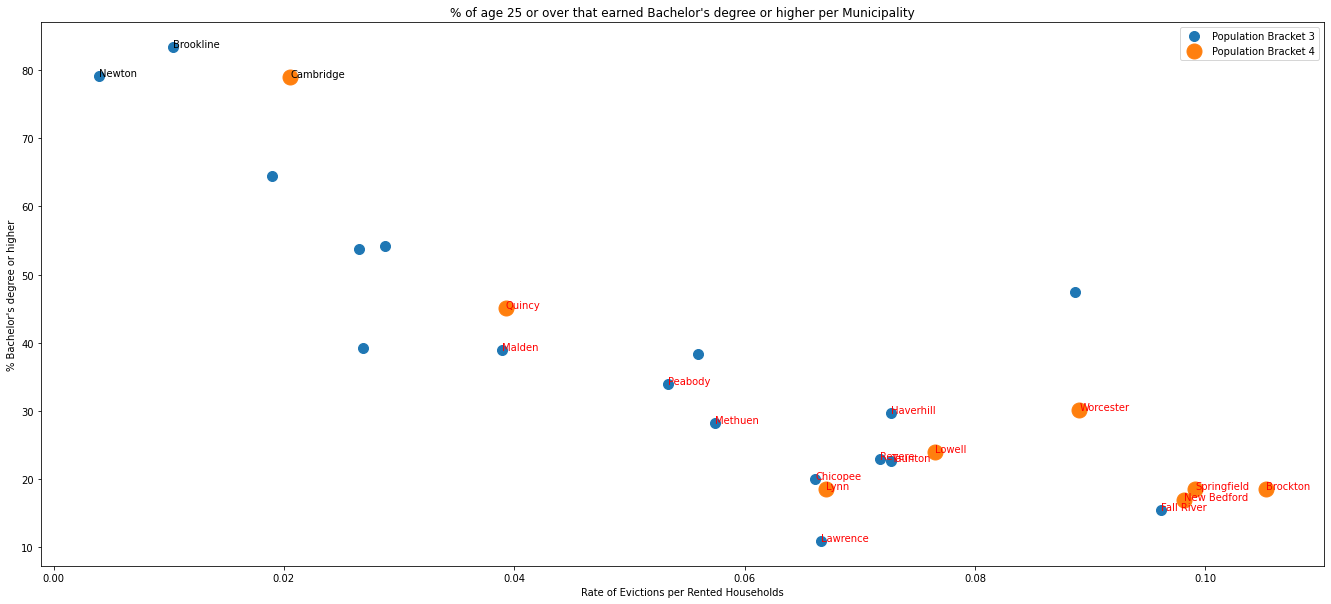

In [61]:
plt.figure(figsize=(23,10))

plt.plot(edu_fifty_to_90_k['Evictions per Rented Households'], edu_fifty_to_90_k["Bachelor's degree or higher"], 'o',
             label="Population Bracket 3", markersize=10)

plt.annotate("Newton", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Newton"]['Evictions per Rented Households'], 
                        edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Newton']["Bachelor's degree or higher"]))
plt.annotate("Brookline", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Brookline"]['Evictions per Rented Households'], 
                        edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Brookline']["Bachelor's degree or higher"]))

plt.annotate("Chicopee", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Chicopee"]['Evictions per Rented Households'], 
                        edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Chicopee']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Fall River", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Fall River"]['Evictions per Rented Households'], 
                          edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Fall River']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Haverhill", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Haverhill"]['Evictions per Rented Households'], 
                        edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Haverhill']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Lawrence", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Lawrence"]['Evictions per Rented Households'], 
                          edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Lawrence']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Malden", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Malden"]['Evictions per Rented Households'], 
                        edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Malden']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Methuen", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Methuen"]['Evictions per Rented Households'], 
                          edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Methuen']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Peabody", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Peabody"]['Evictions per Rented Households'], 
                        edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Peabody']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Revere", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Revere"]['Evictions per Rented Households'], 
                          edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Revere']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Taunton", (edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == "Taunton"]['Evictions per Rented Households'], 
                          edu_fifty_to_90_k[edu_fifty_to_90_k["Muni"] == 'Taunton']["Bachelor's degree or higher"]), color='Red')


plt.plot(edu_ninty_to_200_k['Evictions per Rented Households'], edu_ninty_to_200_k["Bachelor's degree or higher"], 'o',
             label="Population Bracket 4", markersize=15)

plt.annotate("Brockton", (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == "Brockton"]['Evictions per Rented Households'], 
                          edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == 'Brockton']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Lowell", (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == "Lowell"]['Evictions per Rented Households'], 
                          edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == 'Lowell']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Lynn", (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == "Lynn"]['Evictions per Rented Households'], 
                          edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == 'Lynn']["Bachelor's degree or higher"]), color='Red')
plt.annotate("New Bedford", (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == "New Bedford"]['Evictions per Rented Households'], 
                          edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == 'New Bedford']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Quincy", (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == "Quincy"]['Evictions per Rented Households'], 
                          edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == 'Quincy']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Springfield", (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == "Springfield"]['Evictions per Rented Households'], 
                          edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == 'Springfield']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Worcester", (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == "Worcester"]['Evictions per Rented Households'], 
                          edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == 'Worcester']["Bachelor's degree or higher"]), color='Red')

plt.annotate("Cambridge", (edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == "Cambridge"]['Evictions per Rented Households'], 
                          edu_ninty_to_200_k[edu_ninty_to_200_k["Muni"] == 'Cambridge']["Bachelor's degree or higher"]))


plt.title("% of age 25 or over that earned Bachelor's degree or higher per Municipality", color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("% Bachelor's degree or higher")
plt.legend(numpoints=1)

plt.show()

In [ ]:
plt.figure(figsize=(23,10))

rate_edu = linear_model.LinearRegression().fit(np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]["Bachelor's degree or higher"]).tolist())
regression_line = rate_edu.predict(np.array(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]["Bachelor's degree or higher"], 'o',
             label="marker='{0}'".format('o'))
plt.plot(edu_one_to_ten_k[edu_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line, label='Best Fit Line', color='blue', linewidth=4)

plt.annotate("Rockport", (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == "Rockport"]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == 'Rockport']["Bachelor's degree or higher"]))
plt.annotate("Eastham", (edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == "Eastham"]['Evictions per Rented Households'], edu_one_to_ten_k[edu_one_to_ten_k["Muni"] == 'Eastham']["Bachelor's degree or higher"]))

rate_edu = linear_model.LinearRegression().fit(np.array(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]["Bachelor's degree or higher"]).tolist())
regression_line1 = rate_edu.predict(np.array(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line1, label='Best Fit Line for Population Bracket 2', color='orange', linewidth=4)
plt.plot(edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]['Evictions per Rented Households'], edu_ten_to_fifty_k[edu_ten_to_fifty_k['eviction_num'] >=10]["Bachelor's degree or higher"], '.',
             label="Population Bracket 2")

plt.annotate("Dennis", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Dennis"]['Evictions per Rented Households'], edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Dennis']["Bachelor's degree or higher"]))


plt.annotate("Randolph", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Randolph"]['Evictions per Rented Households'], edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Randolph']["Bachelor's degree or higher"]))


plt.annotate("Pittsfield", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Pittsfield"]['Evictions per Rented Households'], edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Pittsfield']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Holyoke", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Holyoke"]['Evictions per Rented Households'], edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Holyoke']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Attleboro", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Attleboro"]['Evictions per Rented Households'], 
                           edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Attleboro']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Barnstable", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Barnstable"]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Barnstable']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Everett", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Everett"]['Evictions per Rented Households'], 
                           edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Everett']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Fitchburg", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Fitchburg"]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Fitchburg']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Leominster", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Leominster"]['Evictions per Rented Households'], 
                           edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Leominster']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Salem", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Salem"]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Salem']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Westfield", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Westfield"]['Evictions per Rented Households'], 
                           edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Westfield']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Salem", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Salem"]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Salem']["Bachelor's degree or higher"]), color='Red')
plt.annotate("Chelsea", (edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == "Chelsea"]['Evictions per Rented Households'], 
                            edu_ten_to_fifty_k[edu_ten_to_fifty_k["Muni"] == 'Chelsea']["Bachelor's degree or higher"]), color='Red')



plt.legend(numpoints=1)
plt.show()